# <center>Método de Leap Frog</center>

Os esquemas numéricos apresentados até agora neste capítulo para resolver a equação da onda linear são todos de primeira ordem de precisão. Na maioria dos casos, os esquemas de primeira ordem não são utilizados para resolver EDPs devido à sua imprecisão inerente. O método leap frog é o método de segunda ordem mais simples. Quando aplicado à equação da onda de primeira ordem, este esquema explícito de um único passo e três níveis de tempo se torna:

\begin{equation}
\frac{u_{j}^{n+1} - u_{j}^{n-1}}{2\Delta t} + c \frac{u_{j+1}^{n} - u_{j-1}^{n}}{2\Delta x} = 0
\tag{4.37}
\end{equation}

O método leap frog é chamado de esquema de três níveis de tempo, pois é necessário conhecer u nos níveis de tempo n e n-1 para encontrar u no nível de tempo n+1. Este método tem um erro de truncamento de O$\left[(\Delta t)^2, (\Delta x)^2\right]$ e é estável sempre que $|\nu| \leq 1$. A equação modificada é dada por:

\begin{equation}
u_t + c u_x = c\frac{(\Delta x)^2}{6}(\nu^2 - 1)u_{xxx} - c \frac{(\Delta x)^4}{120}(9\nu^4 - 10\nu^2 + 1)u_{xxxxx} + \cdots
\tag{4.38}
\end{equation}

O termo principal no erro de truncamento contém a derivada ímpar $u_{xxx}$ e, portanto, a solução predominantemente exibirá erros dispersivos. Isso é típico de métodos de segunda ordem de precisão. Neste caso, no entanto, não há termos de derivada par na equação modificada, de modo que a solução não conterá nenhum erro de dissipação. Como consequência, o algoritmo leap frog é neutramente estável, e erros causados por condições de contorno inadequadas ou arredondamentos computacionais não serão amortecidos (assumindo condições de contorno periódicas e $|\nu| \leq 1$). O fator de amplificação é dado por:

\begin{equation}
G = \pm \sqrt{1 - \nu^2 \sin^2 \beta} - i\nu \sin \beta \quad (4.39)
\end{equation}

Isolando a variável desconhecida em [4.37](#m) temos

\begin{equation}
\frac{u_{j}^{n+1} - u_{j}^{n-1}}{2\Delta t} + c \frac{u_{j+1}^{n} - u_{j-1}^{n}}{2\Delta x} = 0
\end{equation}

\begin{equation}
\frac{u_{j}^{n+1} - u_{j}^{n-1}}{2\Delta t} = - c \frac{u_{j+1}^{n} - u_{j-1}^{n}}{2\Delta x}
\end{equation}

\begin{equation}
u_{j}^{n+1} - u_{j}^{n-1} = - c \frac{2\Delta t}{2\Delta x} \left(u_{j+1}^{n} - u_{j-1}^{n}\right)
\end{equation}

\begin{equation}
u_{j}^{n+1} = u_{j}^{n-1} - c \frac{\Delta t}{\Delta x} \left(u_{j+1}^{n} - u_{j-1}^{n}\right)
\end{equation}

tomando $v = c\frac{\Delta t}{\Delta x}$

\begin{equation}
u_{j}^{n+1} = u_{j}^{n-1} - v \left(u_{j+1}^{n} - u_{j-1}^{n}\right)
\end{equation}

Para calcular o valor da solução em um determinado ponto de tempo, ele usa informações nos dois pontos de tempo anteriores. Isso significa que é necessário conhecer a solução nos pontos de tempo anteriores para calcular a solução no próximo ponto de tempo. Portanto, podemos utilizar outro método para calcular uma segunda solução, para poder aplicar o método de leapfrog. utilizaremos o método de de _lax_.

# Questão 5 da lista 4. 

Resolva, numericamente, a equação da onda:

\begin{equation}
u_t + u_x = 0, \quad 0 \leq x \leq L
\end{equation}

Submetida à condição inicial:

\begin{equation}
u(x, 0) = \sin\left(\frac{2n\pi x}{L}\right)
\end{equation}

e às **condições de contorno periódicas**, utilizando os seguintes esquemas de diferenças finitas:

1. ~~Upstream~~
2. ~~Lax~~
3. **Leap Frog**
4. ~~Lax-Wendroff~~
5. ~~MacCormack~~
6. ~~Lax-Wendroff de 2 passos~~
7. ~~Upwind de 2ª Ordem~~
8. ~~Trapezoidal (Time Centered Implicit)~~
9. ~~Warming-Kutler-Lomax~~
10. ~~Rusanov ($\omega = 3$)~~
11. ~~Euler Explícito~~

Escolha uma malha com 41 pontos e $\Delta x = 1$ (logo,  $L = 40$) e calcule para  $t = 18.$ Resolva este problema para  $n = 3$ e $\nu = 1$, $\nu = 0.6$ e $\nu = 0.3$ e compare graficamente com a solução exata.


Determine $\beta$  para  $n = 3$ e calcule os erros na amplitude e na fase para o esquema com $\nu = 0.6$.
Compare estes erros com os que aparecem nos gráficos.


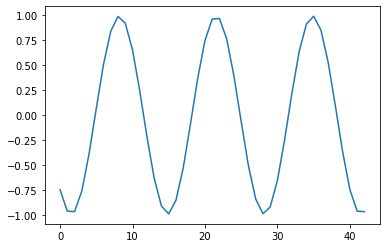

In [7]:
#Método de Lax
 
import numpy as np
import matplotlib.pyplot as plt

l = 40
delta_x = 1
num_pontos = 41
t_final = 18
c = 1
delta_t = 0.1 
n = 3
x = np.arange(0, num_pontos, delta_x)
t = np.arange(0, t_final, delta_t)
num_tempo = len(t)

num_pontos2 = num_pontos + 2

u_num = np.zeros((num_tempo, num_pontos2))

# Definindo as condições iniciais
u_num[0, 1:num_pontos2 - 1] = np.sin((2 * n * np.pi * x) / l)

u_num[0, 0] = u_num[0, num_pontos2 - 3]
u_num[0, num_pontos2 - 1] = u_num[0, 2]

v = (delta_t / delta_x) * c

#aplicando o método de lax para calcular a segunda solução.
for j in range(1, (num_pontos2 - 1)):
    u_num[1, j] = (u_num[0, j + 1] + u_num[0, j - 1]) / 2 - (v / 2) * (u_num[0, j + 1] - u_num[0, j - 1])
    u_num[1, 0] = u_num[1, num_pontos2 - 3]
    u_num[1, num_pontos2 - 1] = u_num[1, 2]

#agora podemos aplicar o método de lax


for n in range(1, num_tempo - 1):
    for j in range(1, (num_pontos2 - 1)):
        u_num[n + 1, j] = u_num[n-1, j] - v * (u_num[n, j+1] - u_num[n, j-1])
        u_num[n+1, 0] = u_num[n+1, num_pontos2 - 3]
        u_num[n+1, num_pontos2 - 1] = u_num[n+1, 2]
        
plt.plot(u_num[-1,:]);